In [77]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/new-york-times-headlines-news/NYT_Headlines.csv
/kaggle/input/s-and-p500-google-trends/SP500_GoogleTrends.csv
/kaggle/input/usa-sp500-fundamentals/USA_SP500_Fundamentals_2004_2023_Combined.csv
/kaggle/input/usa-sp500-fundamentals/USA_SP500_Fundamentals_2004_2023/USA_Cons_Sent_PCH.csv
/kaggle/input/usa-sp500-fundamentals/USA_SP500_Fundamentals_2004_2023/USA_GDP_PCH.csv
/kaggle/input/usa-sp500-fundamentals/USA_SP500_Fundamentals_2004_2023/SP500_Earn_Yield.csv
/kaggle/input/usa-sp500-fundamentals/USA_SP500_Fundamentals_2004_2023/SP500_DIV_YIELD.csv
/kaggle/input/usa-sp500-fundamentals/USA_SP500_Fundamentals_2004_2023/SP500_CAPE_Ratio.csv
/kaggle/input/usa-sp500-fundamentals/USA_SP500_Fundamentals_2004_2023/SP500_PBV.csv
/kaggle/input/usa-sp500-fundamentals/USA_SP500_Fundamentals_2004_2023/USA_FED_Effective_Rate_PCH.csv
/kaggle/input/usa-sp500-fundamentals/USA_SP500_Fundamentals_2004_2023/SP500_Price_Sales_Ratio.csv
/kaggle/input/usa-sp500-fundamentals/USA_SP500_Fundamentals_

In [78]:
# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# import data
!pip install yfinance
import yfinance as yf

# data analysis
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf,month_plot,quarter_plot

# text formatting
from pprint import pprint

# natural language processing
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [79]:
# fetch S&P 500 financial datadata
sp500 = yf.Ticker("^GSPC")

#print all index info
#pprint("Info")
#pprint(sp500.info)

#get stock quotes
sp500 = sp500.history( period="max" )
start_date = '2004-01-01'
end_date = '2023-08-31'
sp500 = sp500[(sp500.index >= start_date) & (sp500.index <= end_date)]

# make all column headers and index name lowercase
sp500.columns = sp500.columns.str.lower()
sp500.index.name = sp500.index.name.lower()

sp500

,open,high,low,close,volume,dividends,stock splits
date,,,,,,,
2004-01-02 00:00:00-05:00,1111.920044,1118.849976,1105.079956,1108.479980,1153200000,0.0,0.0
2004-01-05 00:00:00-05:00,1108.479980,1122.219971,1108.479980,1122.219971,1578200000,0.0,0.0
2004-01-06 00:00:00-05:00,1122.219971,1124.459961,1118.439941,1123.670044,1494500000,0.0,0.0
2004-01-07 00:00:00-05:00,1123.670044,1126.329956,1116.449951,1126.329956,1704900000,0.0,0.0
2004-01-08 00:00:00-05:00,1126.329956,1131.920044,1124.910034,1131.920044,1868400000,0.0,0.0
...,...,...,...,...,...,...,...
2023-08-25 00:00:00-04:00,4389.379883,4418.459961,4356.290039,4405.709961,3296180000,0.0,0.0
2023-08-28 00:00:00-04:00,4426.029785,4439.560059,4414.979980,4433.310059,2957230000,0.0,0.0
2023-08-29 00:00:00-04:00,4432.750000,4500.140137,4431.680176,4497.629883,3354820000,0.0,0.0


In [80]:
# create column for prediction for next day - True if the index increases the next day, or False if it decreases
sp500["tomorrow"] = sp500["close"].shift(-1)
sp500.dropna(subset=['tomorrow'], inplace=True)
sp500["target"] = (sp500["tomorrow"]> sp500["close"]).astype(int)
del sp500['tomorrow']
sp500

,open,high,low,close,volume,dividends,stock splits,target
date,,,,,,,,
2004-01-02 00:00:00-05:00,1111.920044,1118.849976,1105.079956,1108.479980,1153200000,0.0,0.0,1
2004-01-05 00:00:00-05:00,1108.479980,1122.219971,1108.479980,1122.219971,1578200000,0.0,0.0,1
2004-01-06 00:00:00-05:00,1122.219971,1124.459961,1118.439941,1123.670044,1494500000,0.0,0.0,1
2004-01-07 00:00:00-05:00,1123.670044,1126.329956,1116.449951,1126.329956,1704900000,0.0,0.0,1
2004-01-08 00:00:00-05:00,1126.329956,1131.920044,1124.910034,1131.920044,1868400000,0.0,0.0,0
...,...,...,...,...,...,...,...,...
2023-08-24 00:00:00-04:00,4455.160156,4458.299805,4375.549805,4376.310059,3723470000,0.0,0.0,1
2023-08-25 00:00:00-04:00,4389.379883,4418.459961,4356.290039,4405.709961,3296180000,0.0,0.0,1
2023-08-28 00:00:00-04:00,4426.029785,4439.560059,4414.979980,4433.310059,2957230000,0.0,0.0,1


In [81]:
# core modules
from datetime import timezone, datetime

# load the dataset
nyt_hl = pd.read_csv('/kaggle/input/new-york-times-headlines-news/NYT_Headlines.csv', index_col='date',  encoding='utf-8' )
nyt_hl.index = pd.to_datetime(nyt_hl.index)
nyt_hl.index = nyt_hl.index.tz_localize('America/New_York')
nyt_hl

# check for missing values in each column
missing_columns = nyt_hl.isnull().sum()
pprint("Missing values in column")
pprint(missing_columns)
print()
# print all problematic rows
null_mask = nyt_hl.isnull().any(axis=1)
null_rows = nyt_hl[null_mask]
pprint("Null rows")
pprint(null_rows)
print()
# delete null rows
nyt_hl = nyt_hl.dropna()

# group all articles for dates to lists
nyt_hl= nyt_hl.groupby(nyt_hl.index).agg({'headline': list})
nyt_hl


'Missing values in column'
headline    562
dtype: int64

'Null rows'
                          headline
date                              
2004-01-18 00:00:00-05:00      NaN
2004-02-08 00:00:00-05:00      NaN
2004-02-10 00:00:00-05:00      NaN
2004-02-22 00:00:00-05:00      NaN
2004-02-23 00:00:00-05:00      NaN
...                            ...
2022-01-20 00:00:00-05:00      NaN
2022-01-20 00:00:00-05:00      NaN
2022-10-14 00:00:00-04:00      NaN
2022-10-28 00:00:00-04:00      NaN
2022-10-28 00:00:00-04:00      NaN

[562 rows x 1 columns]



,headline
date,
2004-01-01 00:00:00-05:00,[FreeMarkets Agrees to Buy Auction Unit of Cov...
2004-01-02 00:00:00-05:00,"[Homeless in America, Yes, Today, Tony Cragg, ..."
2004-01-03 00:00:00-05:00,"[AIMING TO MAKE FASTER CHIPS, AGERE ACQUIRES T..."
2004-01-04 00:00:00-05:00,"[Wanted: Young Delegates, Corrections, How to ..."
2004-01-05 00:00:00-05:00,"[Cowboys Preparing To Take Next Step, Paid Not..."
...,...
2023-08-27 00:00:00-04:00,"[Flashback: Your Weekly History Quiz, August 2..."
2023-08-28 00:00:00-04:00,[Man Accused of Injecting Substance Into Neigh...
2023-08-29 00:00:00-04:00,[President of Powerful Realtors’ Group Resigns...


In [82]:
# crete new data frame to NLP process headlines for using further for investing prediction
nlp_data = pd.merge(sp500['target'], nyt_hl, on='date')
nlp_data

,target,headline
date,,
2004-01-02 00:00:00-05:00,1,"[Homeless in America, Yes, Today, Tony Cragg, ..."
2004-01-05 00:00:00-05:00,1,"[Cowboys Preparing To Take Next Step, Paid Not..."
2004-01-06 00:00:00-05:00,1,"[Paid Notice: Deaths LUSK, RUTH, Metro Brief..."
2004-01-07 00:00:00-05:00,1,[Rice and Ice Cream: An Oddly Appealing Couple...
2004-01-08 00:00:00-05:00,0,"[Sued by Estate Of Ex-Beatle, Doctor Offers Ac..."
...,...,...
2023-08-24 00:00:00-04:00,1,"[Terry Funk, Hard-Core Hall of Fame Wrestler, ..."
2023-08-25 00:00:00-04:00,1,[Spin. Pilates. Prigozhin? Presidential Busine...
2023-08-28 00:00:00-04:00,1,[Man Accused of Injecting Substance Into Neigh...


In [150]:
# calculate the index for the split point
split_point = int(0.8 * len(nlp_data))  # 80% for training, 20% for testing

nlp_data.reset_index(drop = True, inplace = True)
# cplit the data into training and testing sets
train_data = nlp_data.iloc[:split_point]
test_data = nlp_data.iloc[split_point:]
test_data.reset_index(drop = True, inplace = True)

In [151]:
test_data

,target,headline
0,0,[Group Behind California Privacy Law Aims to S...
1,0,[Person of Interest Is Named in Killing of Tra...
2,1,"[Just How Corrupt Is Bill Barr?, Ryan Murphy, ..."
3,0,[Hong Kong’s Status as Neutral Ground at Risk ...
4,0,[Trump’s Claims About Biden Aren’t ‘Unsupporte...
...,...,...
985,1,"[Terry Funk, Hard-Core Hall of Fame Wrestler, ..."
986,1,[Spin. Pilates. Prigozhin? Presidential Busine...
987,1,[Man Accused of Injecting Substance Into Neigh...
988,1,[President of Powerful Realtors’ Group Resigns...


In [152]:
# splitting the dataset
y_train = train_data['target']
train = train_data['headline']
y_test = test_data['target']
test = test_data['headline']

In [153]:
test.info()
test[0]

<class 'pandas.core.series.Series'>
RangeIndex: 990 entries, 0 to 989
Series name: headline
Non-Null Count  Dtype 
--------------  ----- 
990 non-null    object
dtypes: object(1)
memory usage: 7.9+ KB


['Group Behind California Privacy Law Aims to Strengthen It',
 'The Brewers’ M.V.P. Falls, but the Team Keeps Soaring',
 'Congress Steps Up, Trump Blinks',
 'Vox Media Acquires New York Magazine, Chronicler of the Highbrow and Lowbrow',
 'Democratic Moves Toward Impeaching Trump',
 'Why I Changed My Mind About Impeachment',
 'Review: In ‘The Height of the Storm,’ Two Stars and an Enigma',
 'Review: Paging Pablo Escobar in ‘Our Dear Dead Drug Lord’',
 'Subject of a 2016 U.K. Referendum',
 'How Jussie Smollett Was Written Off the Last Season of ‘Empire’',
 'The Truth About Olivier Rousteing',
 'U.S. Intelligence Officer Who Tried to Share Secrets With China Is Sentenced to 10 Years',
 'Corrections: September 25, 2019',
 'Quotation of the Day: Wednesday, September 25, 2019',
 'Federal Prosecutors Ask Judge to Delay Subpoena of Trump Tax Returns',
 'South Korean Clinic Performed Abortion on Wrong Woman, Police Say',
 'Hazzaa al-Mansoori, First U.A.E. Astronaut, Launches to Space Station',


In [154]:
train = train.apply(lambda x: ', '.join(x))
test = test.apply(lambda x: ', '.join(x))

In [156]:
# removing punctuation and special character from the text
train.replace(to_replace='[^a-zA-Z]', value=' ', regex=True, inplace=True)
test.replace(to_replace='[^a-zA-Z]', value=' ', regex=True, inplace=True)

In [159]:
# converting the entire text to lower case
train = train.str.lower()
test = test.str.lower()

In [160]:
train

0       homeless in america  yes  today  tony cragg   ...
1       cowboys preparing to take next step  paid noti...
2       paid notice  deaths   lusk  ruth  metro briefi...
3       rice and ice cream  an oddly appealing couple ...
4       sued by estate of ex beatle  doctor offers act...
                              ...                        
3953    after tight israeli election  netanyahu s tenu...
3954    we re not the saudis  mercenaries  as trump we...
3955    deportation exemptions to resume for immigrant...
3956    don t mess with modi in texas  emmy winners  t...
3957    the math says the mets are alive  common sense...
Name: headline, Length: 3958, dtype: object

In [161]:
len(train)

3958

In [125]:
# Creating corpus of train dataset
ps = PorterStemmer()
train_corpus = []

for i in range(0, len(train)):
  
  # Tokenizing the news-title by words
  words = train[i].split()

  # Removing the stopwords
  words = [word for word in words if word not in set(stopwords.words('english'))]

  # Stemming the words
  words = [ps.stem(word) for word in words]

  # Joining the stemmed words
  headline = ' '.join(words)

  # Building a corpus of news-title
  train_corpus.append(headline)

In [ ]:
train_corpus[0:10]

In [162]:
# Creating corpus of test dataset
test_corpus = []

for i in range(0, len(test)):
  
  # Tokenizing the news-title by words
  words = test[i].split()

  # Removing the stopwords
  words = [word for word in words if word not in set(stopwords.words('english'))]

  # Stemming the words
  words = [ps.stem(word) for word in words]

  # Joining the stemmed words
  headline = ' '.join(words)

  # Building a corpus of news-title
  test_corpus.append(headline)

In [164]:
test_corpus[0:10]

['group behind california privaci law aim strengthen brewer v p fall team keep soar congress step trump blink vox media acquir new york magazin chronicl highbrow lowbrow democrat move toward impeach trump chang mind impeach review height storm two star enigma review page pablo escobar dear dead drug lord subject u k referendum jussi smollett written last season empir truth olivi roust u intellig offic tri share secret china sentenc year correct septemb quotat day wednesday septemb feder prosecutor ask judg delay subpoena trump tax return south korean clinic perform abort wrong woman polic say hazzaa al mansoori first u e astronaut launch space station polit place suprem court chief justic robert say impeach bori johnson volkswagen wednesday brief tv wednesday stumptown abstract get arrest abort word quiz churl blood red sky fire leav million indonesian gasp alexandria ocasio cortez next big effort tackl poverti lordstown plant idl hover g strike talk abus daughter state took anyway cuo

In [127]:
down_words = []
for i in list(y_train[y_train==0].index):
  down_words.append(train_corpus[i])

up_words = []
for i in list(y_train[y_train==1].index):
  up_words.append(train_corpus[i])

In [133]:
down_words.info()

AttributeError: 'list' object has no attribute 'info'

In [132]:
# Creating wordcloud for down_words
from wordcloud import WordCloud
wordcloud1 = WordCloud(background_color='white', width=3000, height=2500).generate(down_words)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud1)
plt.axis('off')
plt.title("Words which indicate a fall in DJIA ")
plt.show()

TypeError: expected string or bytes-like object

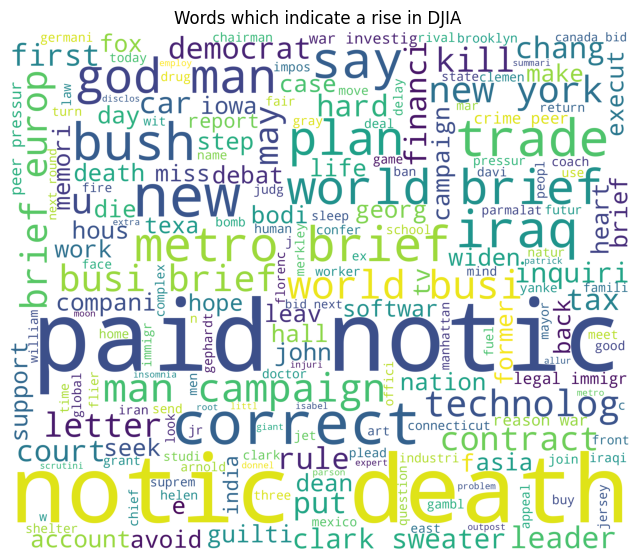

In [131]:
# Creating wordcloud for up_words
wordcloud2 = WordCloud(background_color='white', width=3000, height=2500).generate(up_words[5])
plt.figure(figsize=(8,8))
plt.imshow(wordcloud2)
plt.axis('off')
plt.title("Words which indicate a rise in DJIA ")
plt.show()

In [134]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=10000, ngram_range=(2,2))
X_train = cv.fit_transform(train_corpus).toarray()

In [139]:
#test model to append to others features
X_train.shape

(3958, 10000)

In [165]:
X_test = cv.transform(test_corpus).toarray()

In [169]:
X_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])